In [1]:
!nvidia-smi

Tue Mar  7 16:55:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
from zipfile import ZipFile
zip = ZipFile('/content/data.zip')
zip.extractall()

In [8]:
!yolo task=detect mode = train model = yolov8s.pt data=/content/data.yaml epochs=100 imgsz=224 plots = True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=100, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17,

In [9]:
!ls /content/runs/detect/train

args.yaml					    train_batch2.jpg
events.out.tfevents.1678209001.a47311bfbf18.4572.0  train_batch720.jpg
results.csv					    train_batch721.jpg
results.png					    train_batch722.jpg
train_batch0.jpg				    weights
train_batch1.jpg


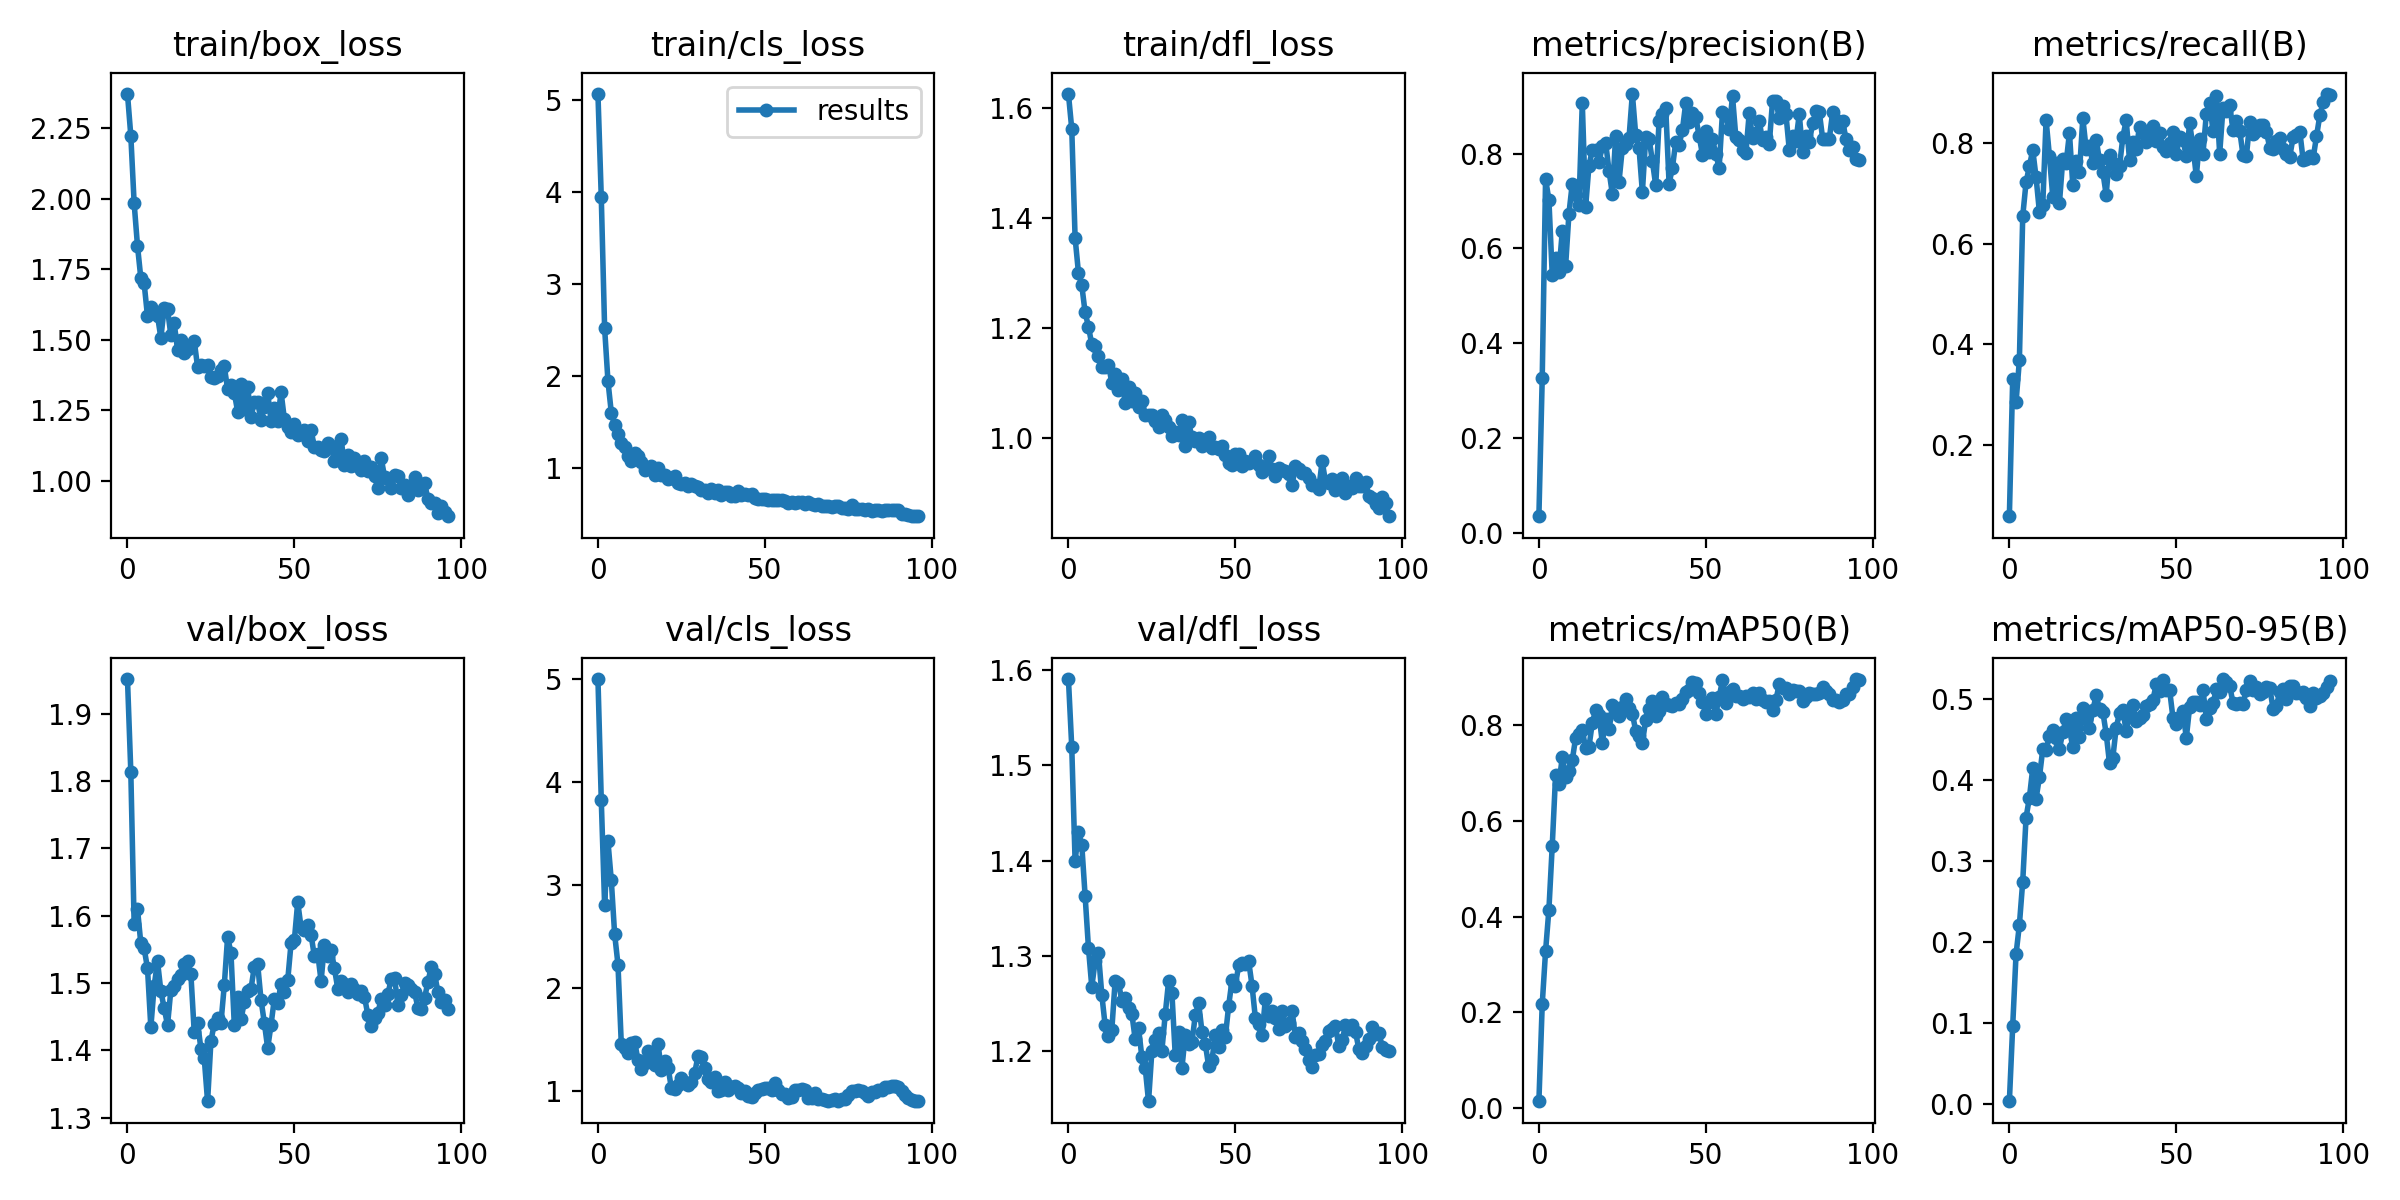

In [11]:
Image(filename = '/content/runs/detect/train/results.png', width=600)

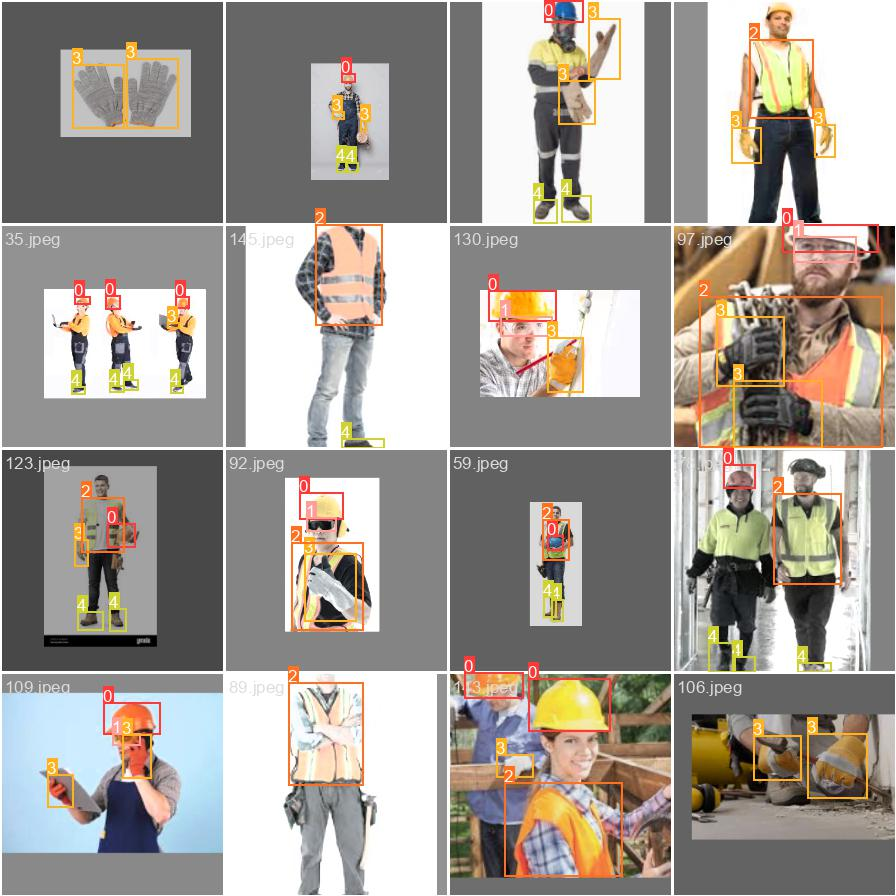

In [14]:
Image(filename = '/content/runs/detect/train/train_batch722.jpg', width=600)

In [15]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.41it/s]
                   all         31        101      0.858      0.797      0.875      0.522
                Helmet         31         18      0.886          1      0.975      0.682
               Goggles         31          9      0.578      0.778      0.787      0.357
                Jacket         31         14      0.953      0.786      0.892      0.637
                Gloves         31         52       0.88      0.422      0.725      0.389
              Footwear         31          8       0.99          1      0.995      0.544
Speed: 0.1ms pre-process, 6.1ms inference, 0.0ms loss, 9.8m

In [16]:
!yolo task=detect mode = predict model= /content/runs/detect/train/weights/best.pt conf=0.5 source=/content/data/test/images

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/data/test/images/1.jpeg: 192x224 1 Helmet, 1 Goggles, 2 Glovess, 14.4ms
image 2/31 /content/data/test/images/10.jpeg: 160x224 1 Gloves, 13.7ms
image 3/31 /content/data/test/images/11.jpeg: 224x224 3 Glovess, 8.9ms
image 4/31 /content/data/test/images/12.jpeg: 192x224 1 Jacket, 9.0ms
image 5/31 /content/data/test/images/13.jpeg: 128x224 1 Gloves, 12.9ms
image 6/31 /content/data/test/images/14(1).jpeg: 224x224 1 Jacket, 9.5ms
image 7/31 /content/data/test/images/14.jpg: 192x224 2 Helmets, 9.7ms
image 8/31 /content/data/test/images/15.jpeg: 224x224 8.8ms
image 9/31 /content/data/test/images/16.jpeg: 224x160 1 Helmet, 1 Goggles, 1 Jacket, 1 Gloves, 13.0ms
image 10/31 /content/data/test/images/17.jpeg: 160x224 1 Helmet, 1 Goggles, 1 Jacket, 1 Gloves, 10.1ms
image 11/31 /content/data/test/images/18.jpeg: 22

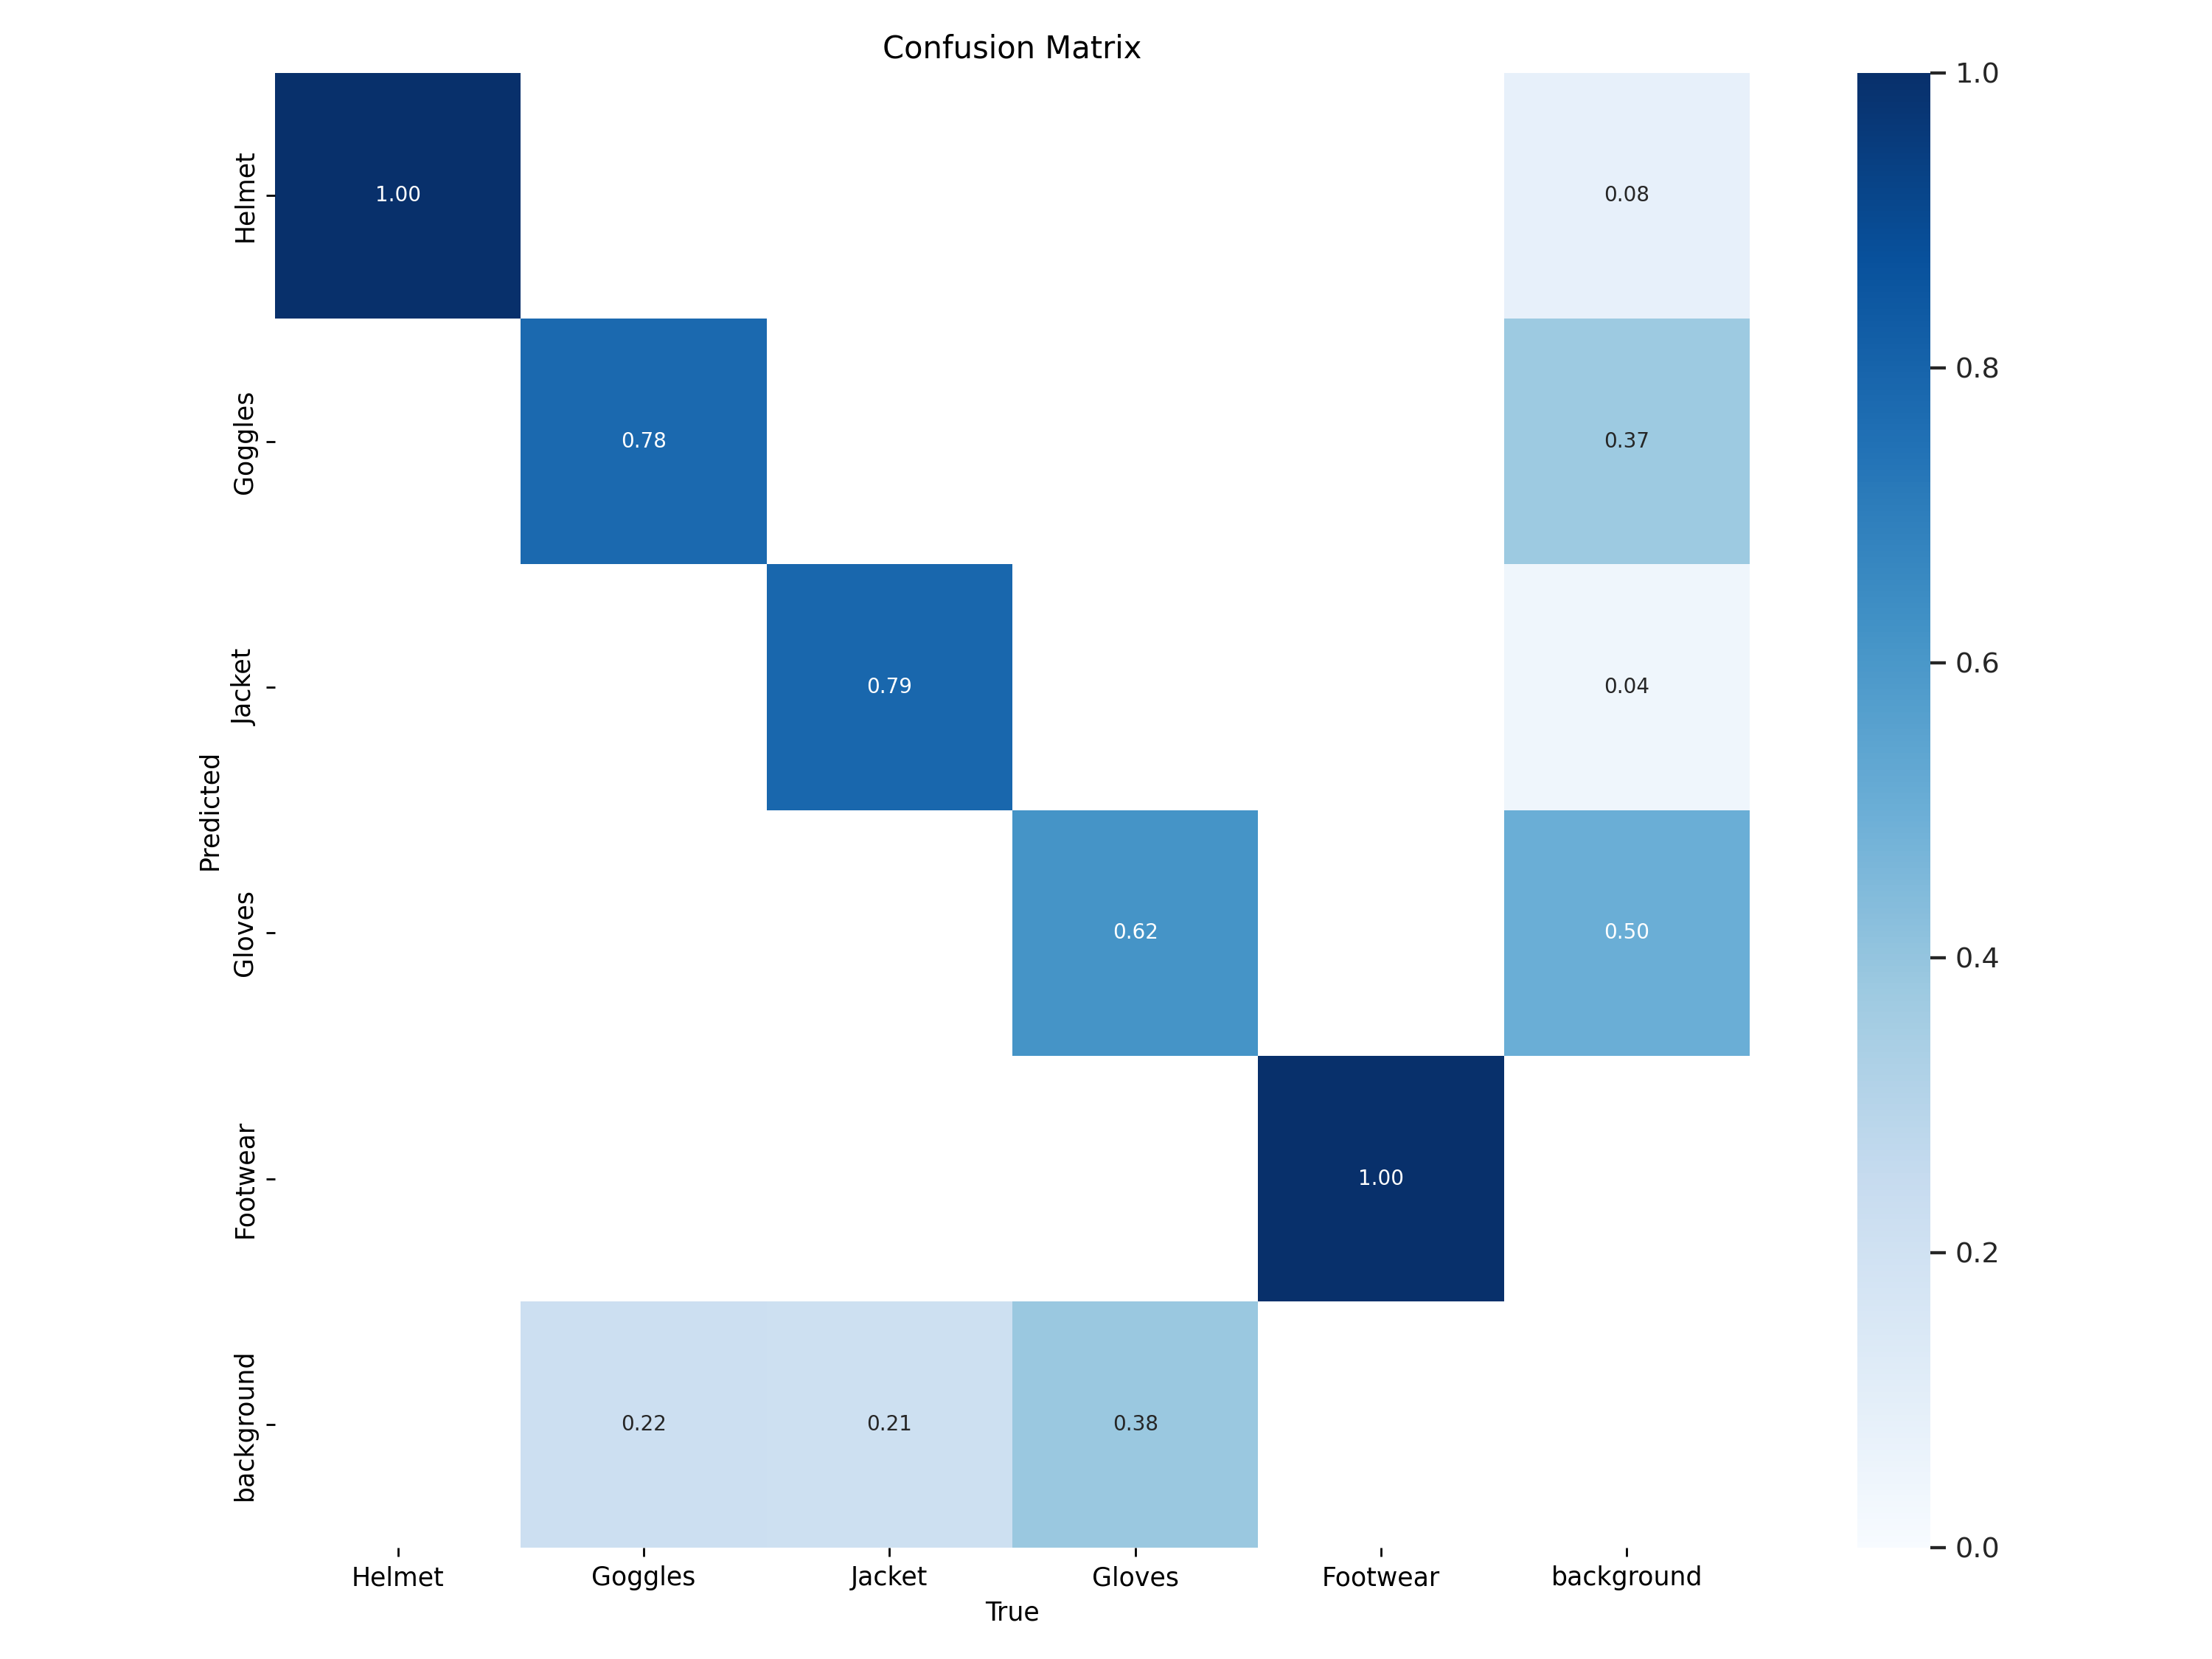

In [19]:
Image(filename="/content/runs/detect/val/confusion_matrix.png", width=600)

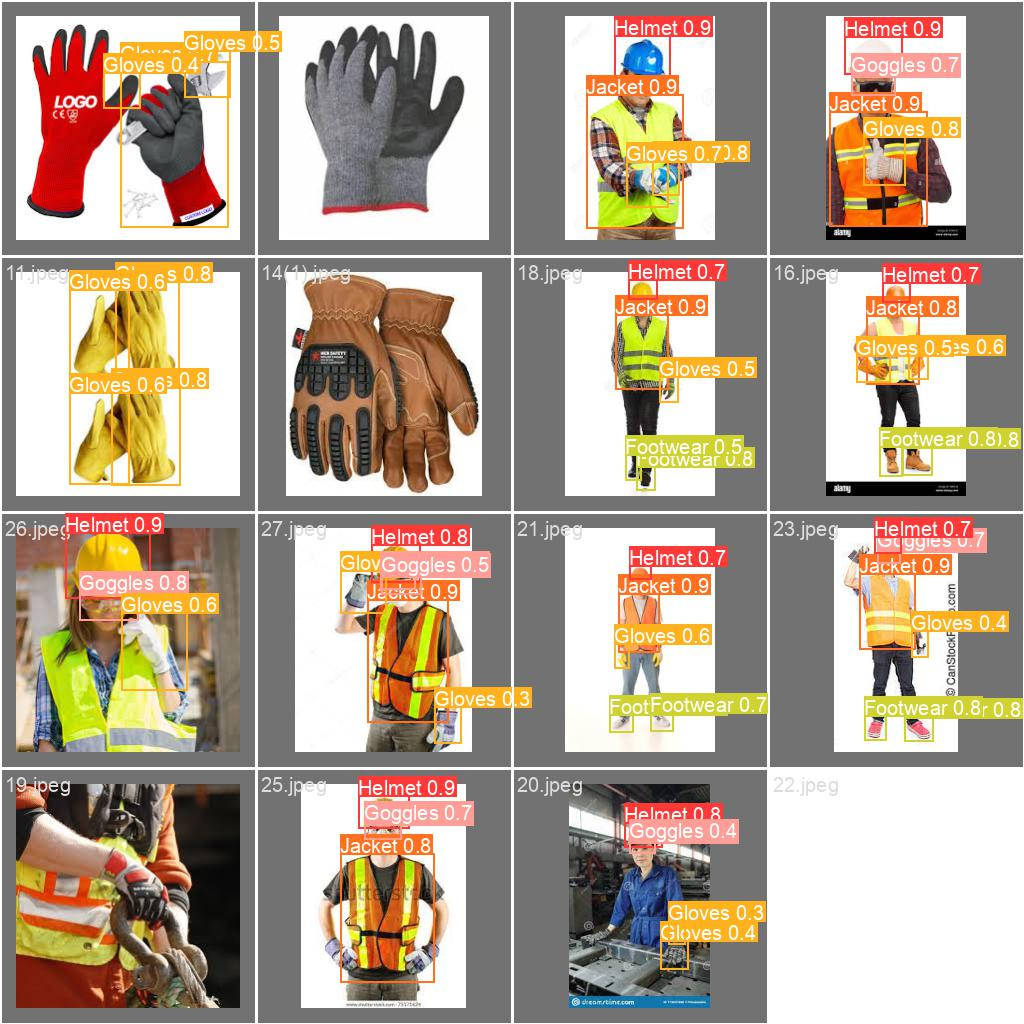

In [20]:
Image(filename="/content/runs/detect/val/val_batch1_pred.jpg", width=600)

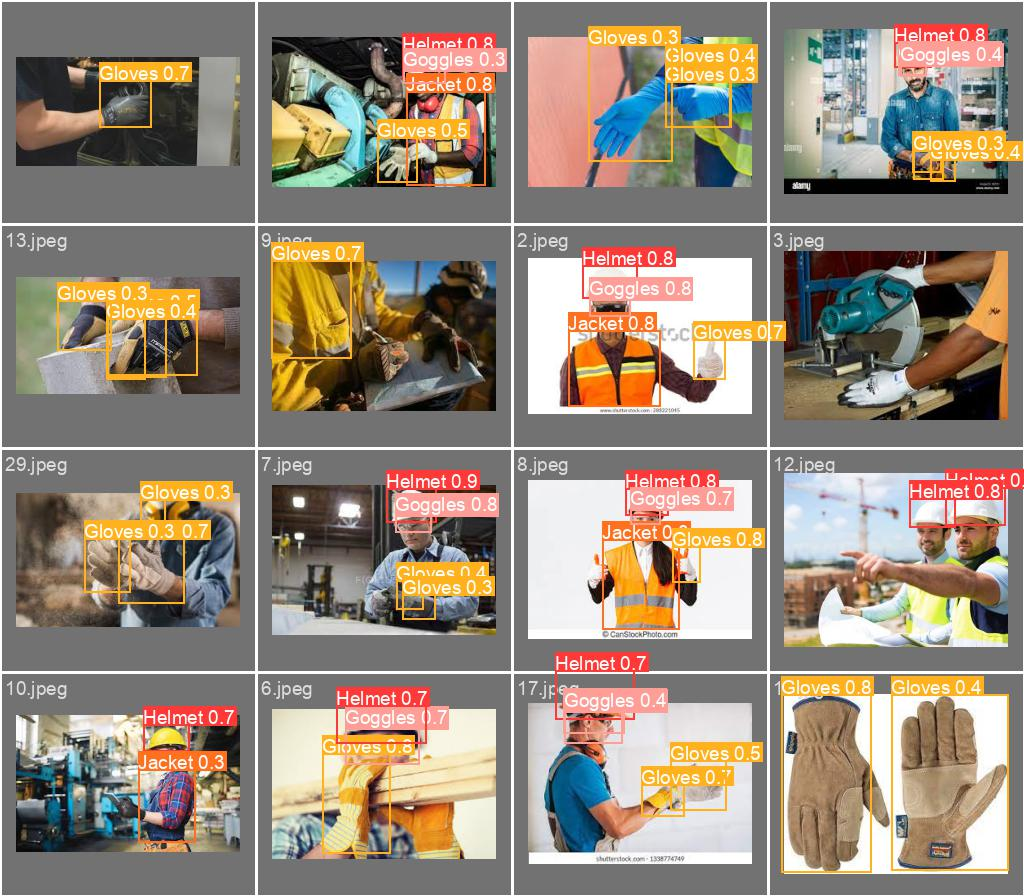

In [21]:
Image(filename="/content/runs/detect/val/val_batch0_pred.jpg", width=600)

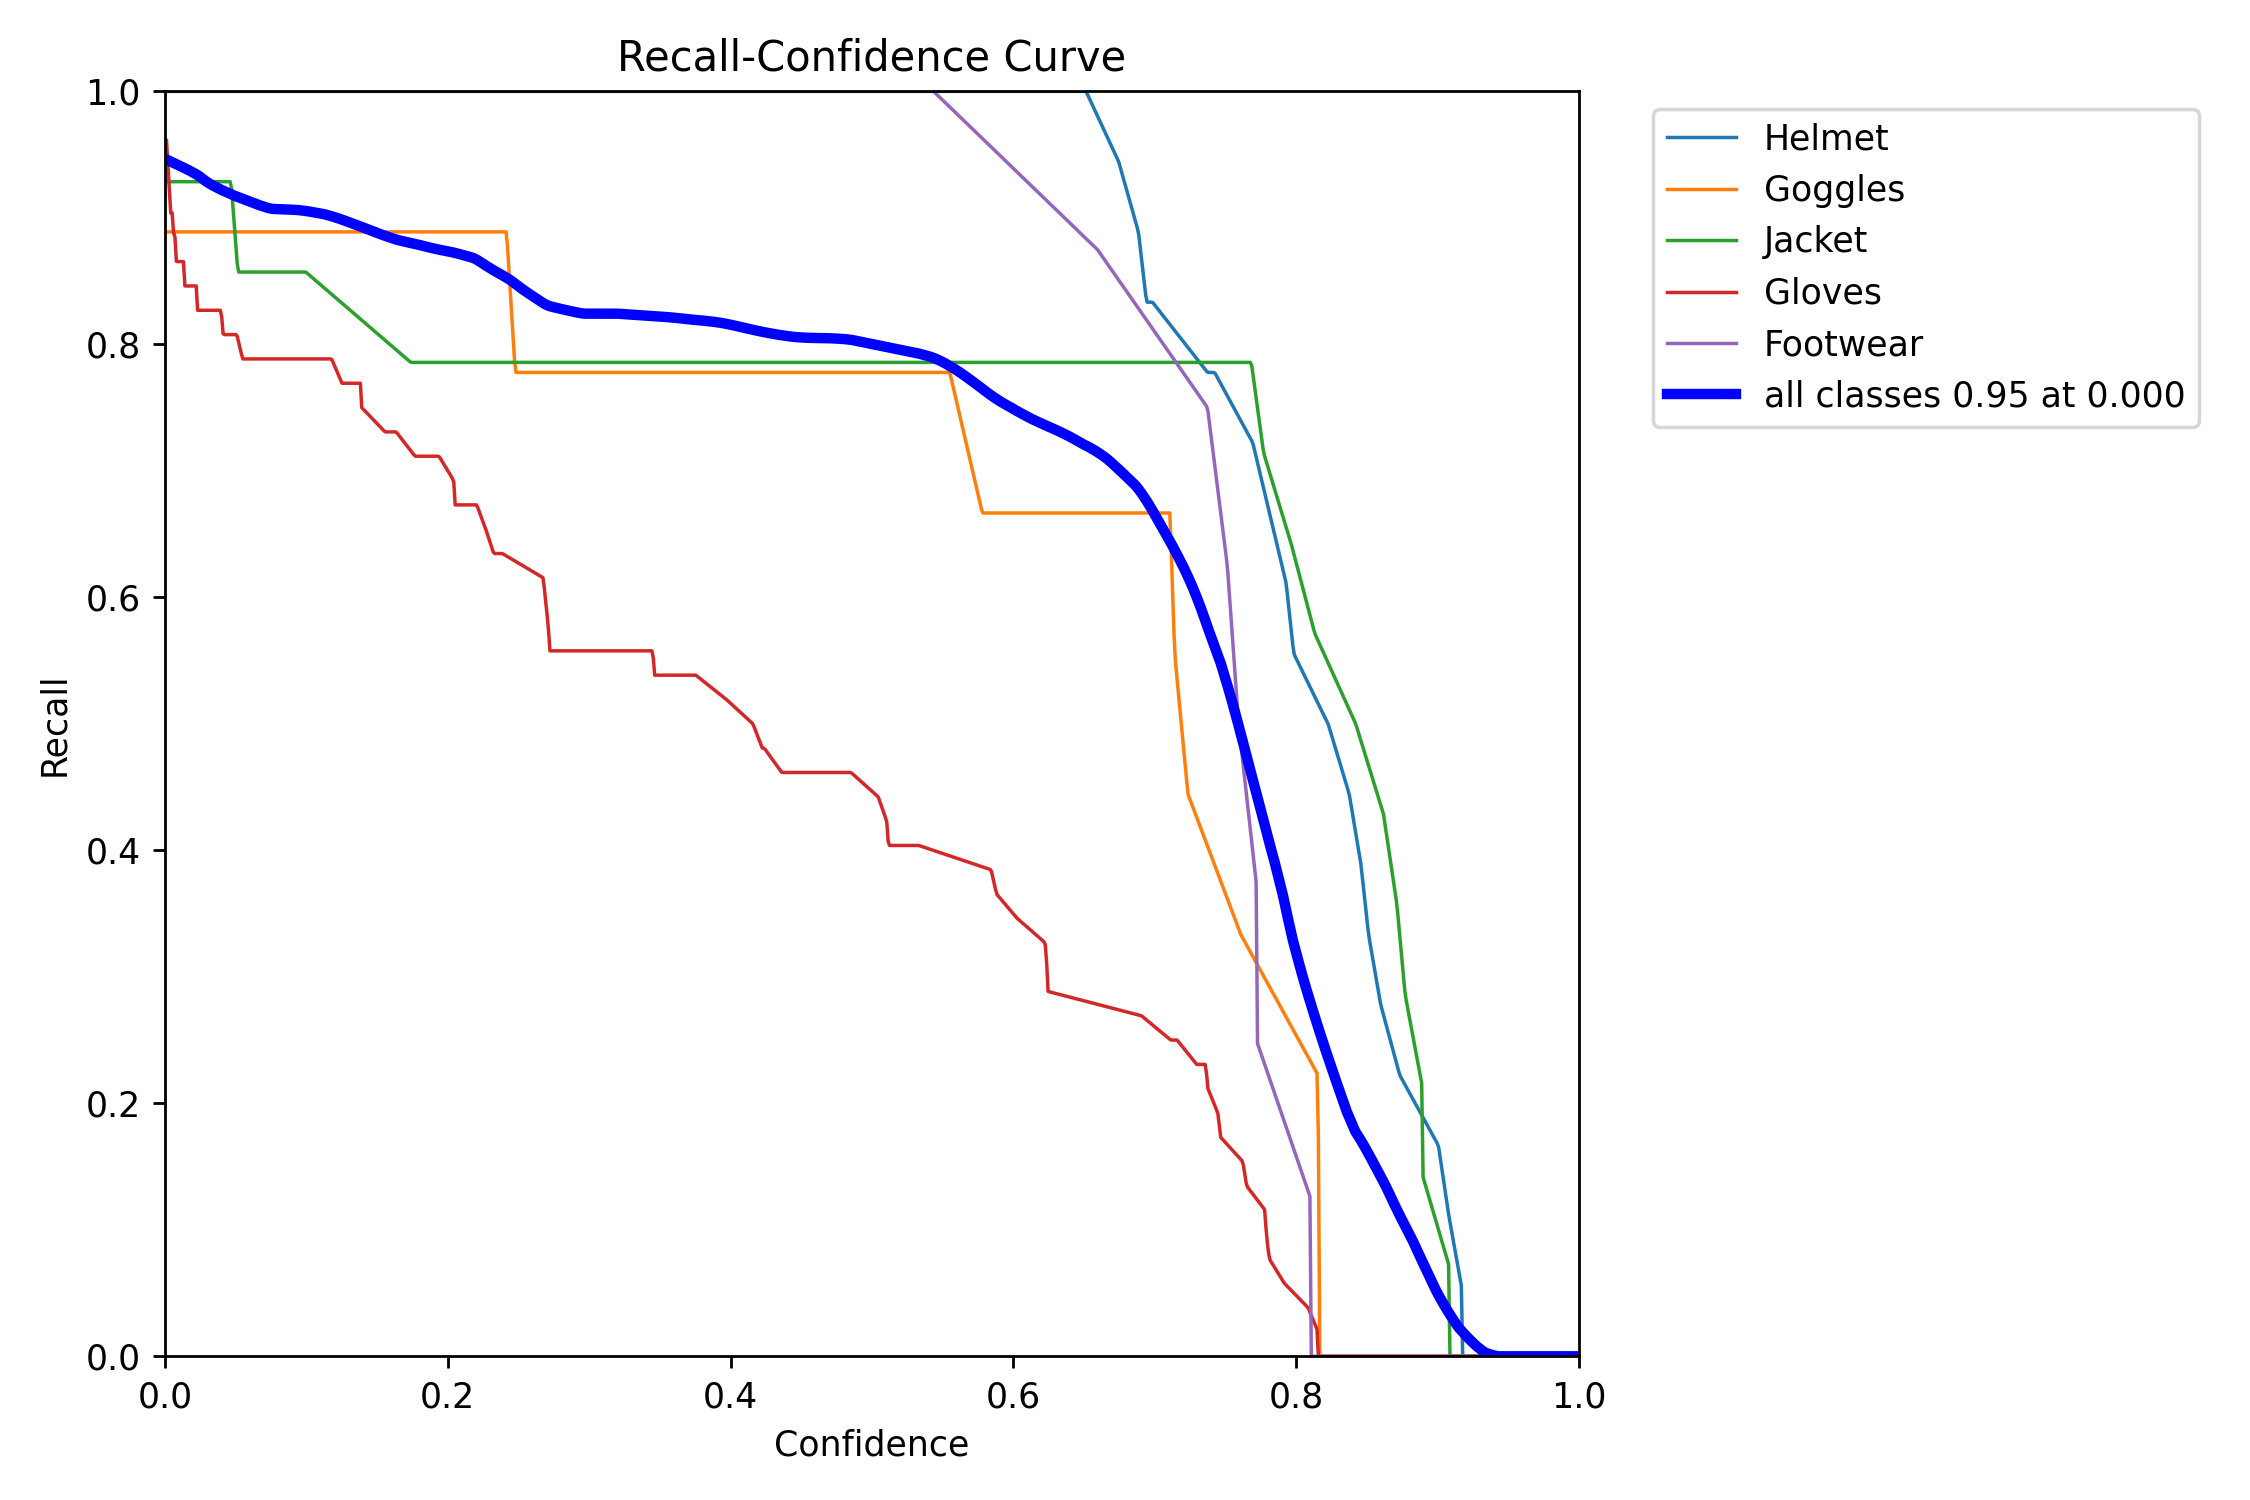

In [22]:
Image(filename="/content/runs/detect/val/R_curve.png", width=600)

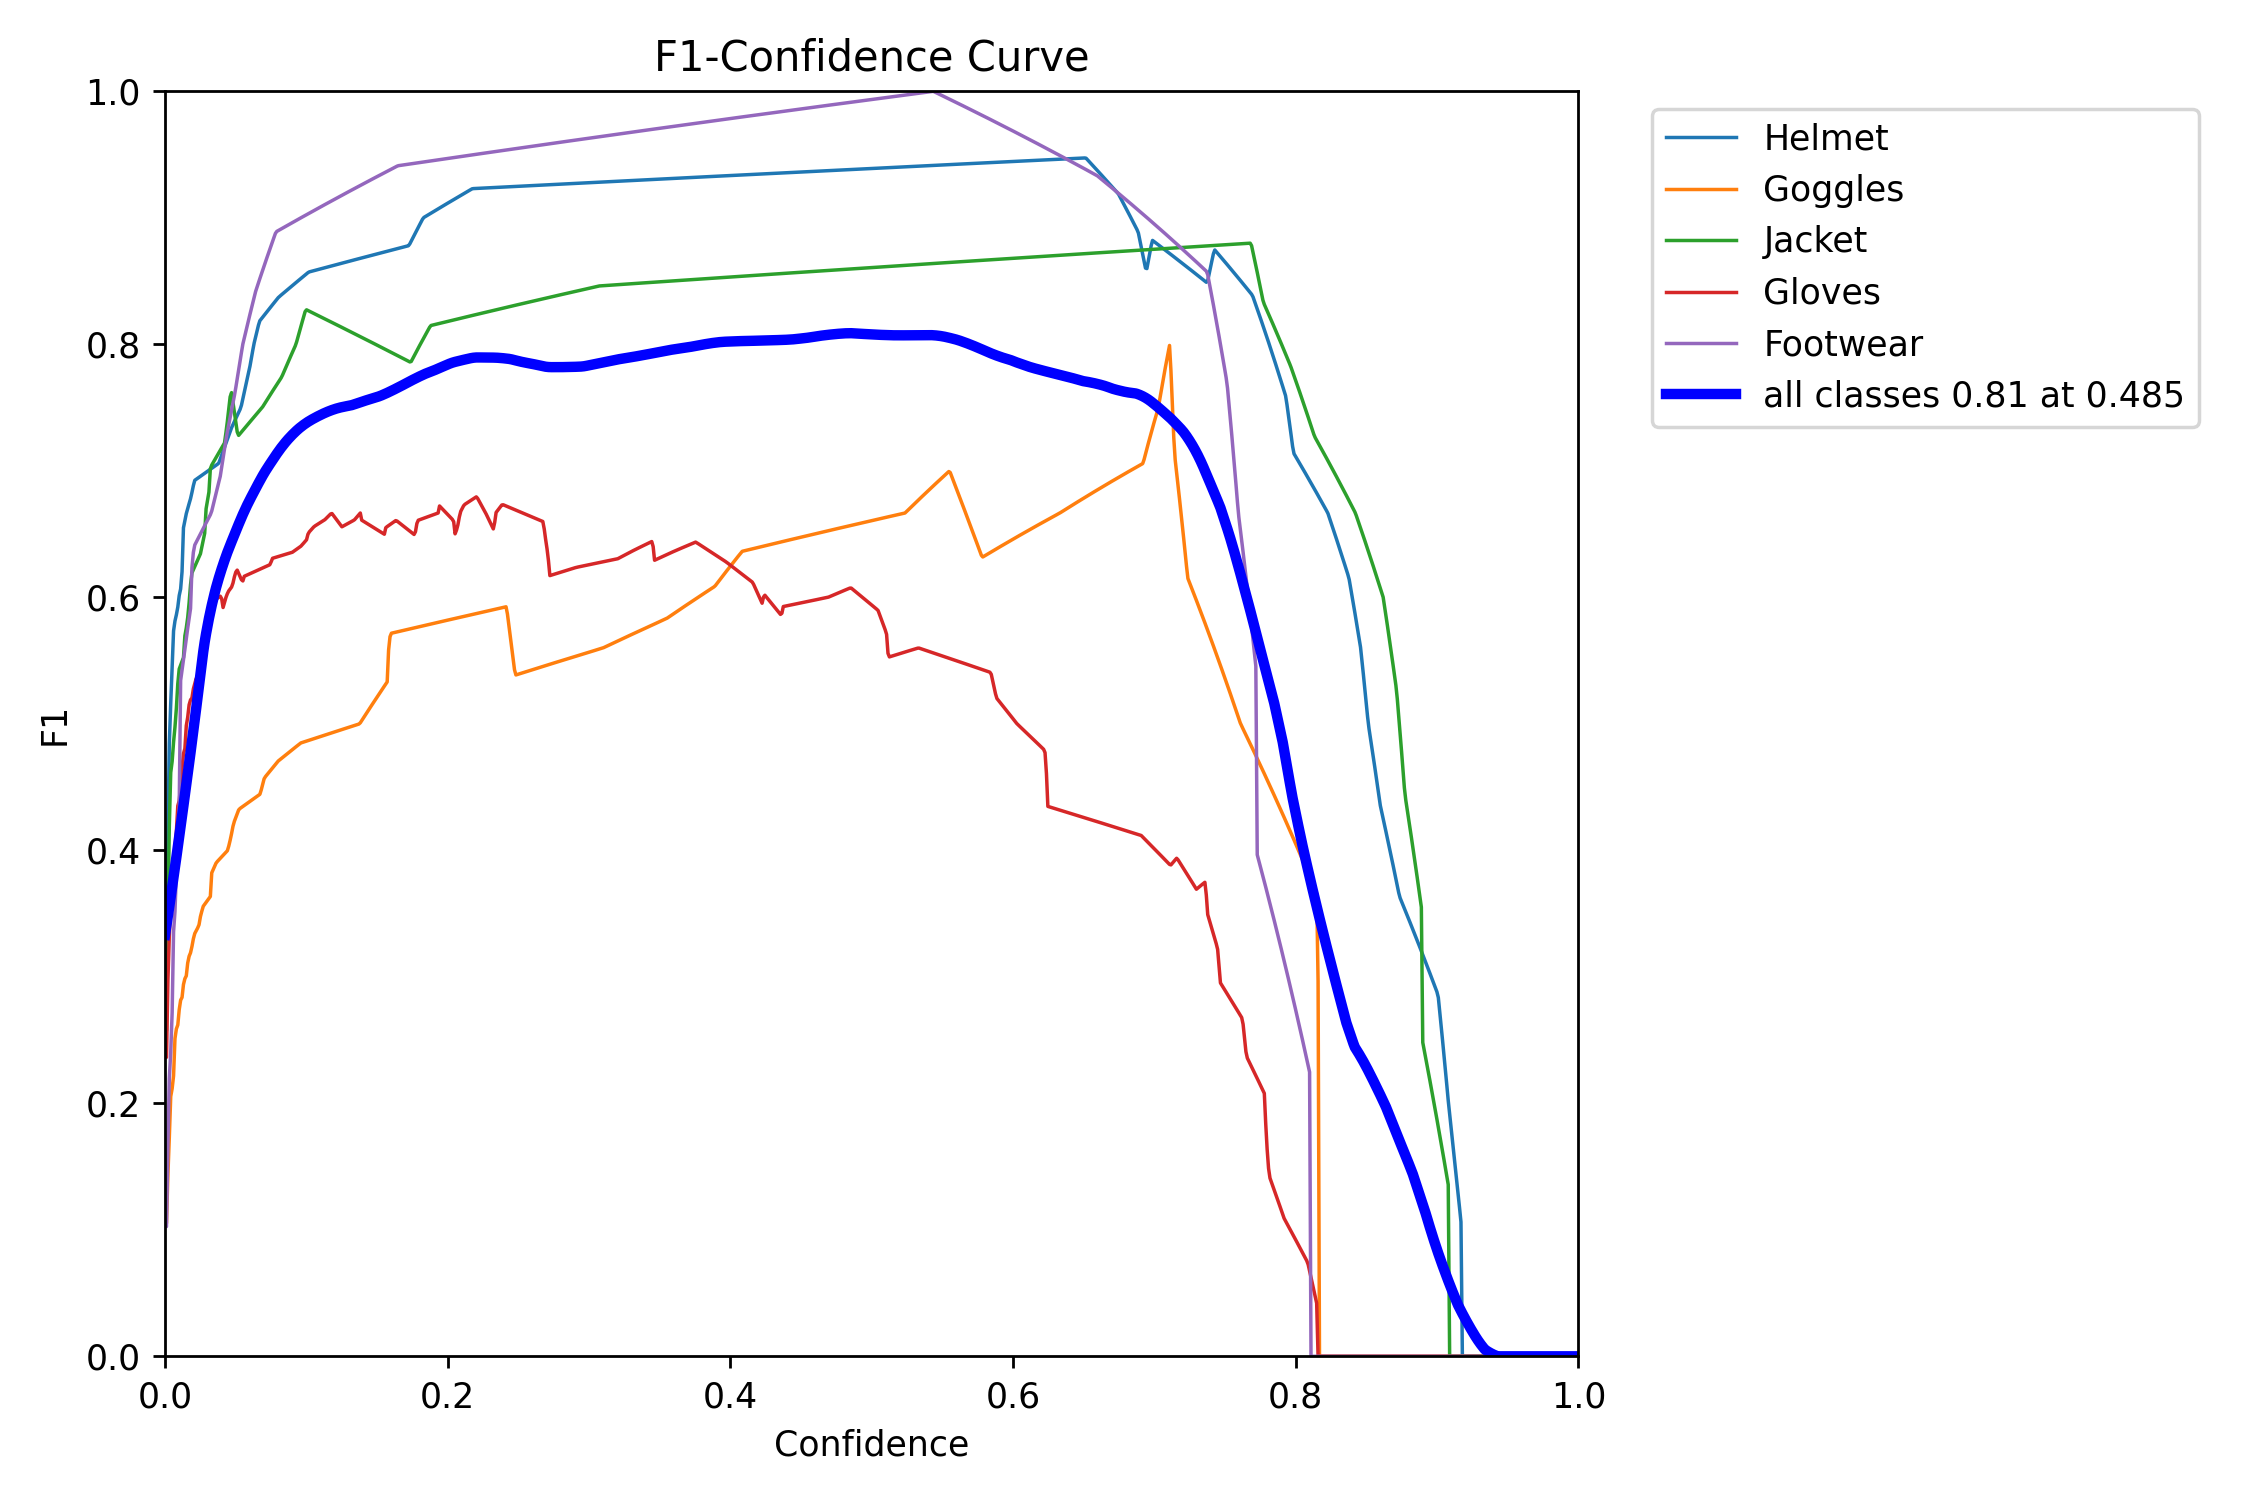

In [23]:
Image(filename="/content/runs/detect/val/F1_curve.png", width=600)